In [1]:
# ============================================================================ #
#        PRE-ANALYSIS: INTENSITY/VOLUME of TWITTER COMMUNCIATION               #
# ============================================================================ #

#NOTE## use raw data file (with all columns/variables), thereby keeping hyperlinks, hashtags, mentions etc.
#task A: TWEET-level (pre)analysis incl. twitter metrics (≠ B: USER-LEVEL)


#1## LOADING LIBRARIES/PACKAGES

#load inspection, formatting, and data (e.g. temporal) manipulation tools
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import calendar

#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

#import graphing libraries
import matplotlib
import seaborn as sns   #for prettying up matplotlib graphics
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import*        #necessary of xticks option etc


%matplotlib inline
mpl.style.available

#to have bigger default plots
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
# tweet files
TW_files = [
    '../data/account_tweets/2014_DELTANMD_data.csv',
    '../data/account_tweets/2015_DELTANMD_data.csv',
]

# tweet replies files
TWR_files = [
    '../data/replies/2014_DELTANMD_replies_data.csv',
    '../data/replies/2014_DELTANMD_replies_data.csv',
]

df_IVCT = [pd.read_csv(file) for file in TW_files]
df_IVCR = [pd.read_csv(file) for file in TWR_files]

In [3]:
df_IVCT[0].head(2)

,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count
0,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42858733728...,conv_id: 428587337283813376,NaN,2014-01-29 17:55:58+00:00,RT @MPF_PGR: MPF consegue bloqueio de bens de ...,True,pt,4,0,0
1,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42858726266...,conv_id: 428587262667145216,NaN,2014-01-29 17:55:40+00:00,RT @CNN: A senate aide who killed himself afte...,True,en,105,0,0


In [4]:
df_IVCR[0].head(2)

,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count
0,https://twitter.com/i/user/65052308,rodriggolima,2009-08-12 14:43:27+00:00,1181,510,False,https://twitter.com/twitter/status/11458423563...,conv_id: 424178487730397184,NaN,2019-07-01 23:51:21+00:00,@MoniqueCheker @deltanmd @VladimirAras @FabioS...,False,pt,0,0,0
1,https://twitter.com/i/user/191640915,RibeirosXingu,2010-09-16 23:40:43+00:00,690,1103,False,https://twitter.com/twitter/status/11457987717...,conv_id: 424178487730397184,Brasilien,2019-07-01 20:58:09+00:00,@deltanmd @MoniqueCheker É Bixa!!! Sai do armá...,False,pt,0,0,0


In [5]:
# Step 1: Text Matching
# For hyperlinks
df_IVCT[0]['hyperlink'] = df_IVCT[0]['tweet_text'].str.contains(r'http\S+', na=False).astype(float)
df_IVCR[0]['hyperlink'] = df_IVCR[0]['tweet_text'].str.contains(r'http\S+', na=False).astype(float)

In [6]:
# For mentions
df_IVCT[0]['mention'] = df_IVCT[0]['tweet_text'].str.contains(r'@[A-Za-z0-9_]+(:)?', na=False).astype(float)
df_IVCR[0]['mention'] = df_IVCR[0]['tweet_text'].str.contains(r'@[A-Za-z0-9_]+(:)?', na=False).astype(float)

/var/folders/8y/jg6dljmn51dcd3fm_rjs1crr0000gn/T/ipykernel_7235/3993800657.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_IVCT[0]['mention'] = df_IVCT[0]['tweet_text'].str.contains(r'@[A-Za-z0-9_]+(:)?', na=False).astype(float)
/var/folders/8y/jg6dljmn51dcd3fm_rjs1crr0000gn/T/ipykernel_7235/3993800657.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_IVCR[0]['mention'] = df_IVCR[0]['tweet_text'].str.contains(r'@[A-Za-z0-9_]+(:)?', na=False).astype(float)


In [7]:
# For hashtags
df_IVCT[0]['hashtag'] = df_IVCT[0]['tweet_text'].str.contains(r'#[A-Za-z0-9_]+(:)?', na=False).astype(float)
df_IVCR[0]['hashtag'] = df_IVCR[0]['tweet_text'].str.contains(r'#[A-Za-z0-9_]+(:)?', na=False).astype(float)

/var/folders/8y/jg6dljmn51dcd3fm_rjs1crr0000gn/T/ipykernel_7235/1928950192.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_IVCT[0]['hashtag'] = df_IVCT[0]['tweet_text'].str.contains(r'#[A-Za-z0-9_]+(:)?', na=False).astype(float)
/var/folders/8y/jg6dljmn51dcd3fm_rjs1crr0000gn/T/ipykernel_7235/1928950192.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_IVCR[0]['hashtag'] = df_IVCR[0]['tweet_text'].str.contains(r'#[A-Za-z0-9_]+(:)?', na=False).astype(float)


In [8]:
# Step 2: Convert to Numerical Format (You don't need to repeat these conversions)

# Print the number of variables and the number of tweets
print("# of variables in df_IVCT:", len(df_IVCT[0].columns))
print("# of tweets in df_IVCT:", len(df_IVCT[0]))
df_IVCT[0].head()

# of variables in df_IVCT: 19
# of tweets in df_IVCT: 84


,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag
0,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42858733728...,conv_id: 428587337283813376,NaN,2014-01-29 17:55:58+00:00,RT @MPF_PGR: MPF consegue bloqueio de bens de ...,True,pt,4,0,0,1.0,1.0,0.0
1,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42858726266...,conv_id: 428587262667145216,NaN,2014-01-29 17:55:40+00:00,RT @CNN: A senate aide who killed himself afte...,True,en,105,0,0,1.0,1.0,0.0
2,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42681418667...,conv_id: 426814186677489666,NaN,2014-01-24 20:30:06+00:00,"""It is what difference we have made to the li...",False,en,1,0,1,0.0,0.0,0.0
3,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42651655336...,conv_id: 426516553367314433,NaN,2014-01-24 00:47:25+00:00,RT @VladimirAras: BBC News - Man jailed for re...,True,en,4,0,0,1.0,1.0,0.0
4,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42651459807...,conv_id: 426302397930307584,NaN,2014-01-24 00:39:39+00:00,@JaniceAscari Tks querida ;),False,es,0,1,0,0.0,1.0,0.0


In [9]:
print("# of variables in df_IVCR:", len(df_IVCR[0].columns))
print("# of tweets in df_IVCR:", len(df_IVCR[0]))
df_IVCR[0].head()

# of variables in df_IVCR: 19
# of tweets in df_IVCR: 7904


,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag
0,https://twitter.com/i/user/65052308,rodriggolima,2009-08-12 14:43:27+00:00,1181,510,False,https://twitter.com/twitter/status/11458423563...,conv_id: 424178487730397184,NaN,2019-07-01 23:51:21+00:00,@MoniqueCheker @deltanmd @VladimirAras @FabioS...,False,pt,0,0,0,0.0,1.0,0.0
1,https://twitter.com/i/user/191640915,RibeirosXingu,2010-09-16 23:40:43+00:00,690,1103,False,https://twitter.com/twitter/status/11457987717...,conv_id: 424178487730397184,Brasilien,2019-07-01 20:58:09+00:00,@deltanmd @MoniqueCheker É Bixa!!! Sai do armá...,False,pt,0,0,0,0.0,1.0,0.0
2,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457833763...,conv_id: 424178487730397184,NaN,2019-07-01 19:56:59+00:00,"@vallmotta @MoniqueCheker Muito lindo isso, né...",False,pt,0,1,0,0.0,1.0,0.0
3,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457828944...,conv_id: 424178487730397184,NaN,2019-07-01 19:55:04+00:00,"@MoniqueCheker Môôôô, ói nóis aqui te seguindo...",False,pt,0,0,0,0.0,1.0,0.0
4,https://twitter.com/i/user/2430760789,bruce_luciano,2014-04-06 17:11:54+00:00,327,496,False,https://twitter.com/twitter/status/11457721765...,conv_id: 424178487730397184,NaN,2019-07-01 19:12:28+00:00,@deltanmd @rotchajunior @MoniqueCheker Valeu a...,False,pt,0,0,0,1.0,1.0,0.0


In [10]:
##Generating dummy/binary variables from numerical data: RTs_dummy from retweet_count, likes_dummy from like_count
# For retweets
df_IVCT[0]['RTs_dummy_IVCT'] = np.where(df_IVCT[0]['retweet_count'] == 0, 0, 1)   #there is already a is_retweet dummy in the DF - scrap this?!
df_IVCR[0]['RTs_dummy_IVCR'] = np.where(df_IVCR[0]['retweet_count'] == 0, 0, 1)

# For likes
df_IVCT[0]['likes_dummy_IVCT'] = np.where(df_IVCT[0]['like_count'] == 0, 0, 1)
df_IVCR[0]['likes_dummy_IVCR'] = np.where(df_IVCR[0]['like_count'] == 0, 0, 1)

# Print the number of variables and the number of tweets
print("# of variables in df_IVCT:", len(df_IVCT[0].columns))
print("# of tweets in df_IVCT:", len(df_IVCT[0]))
df_IVCT[0].head()

print("# of variables in df_IVCR:", len(df_IVCR[0].columns))
print("# of tweets in df_IVCR:", len(df_IVCR[0]))
df_IVCR[0].head()

# of variables in df_IVCT: 21
# of tweets in df_IVCT: 84
# of variables in df_IVCR: 21
# of tweets in df_IVCR: 7904


,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag,RTs_dummy_IVCR,likes_dummy_IVCR
0,https://twitter.com/i/user/65052308,rodriggolima,2009-08-12 14:43:27+00:00,1181,510,False,https://twitter.com/twitter/status/11458423563...,conv_id: 424178487730397184,NaN,2019-07-01 23:51:21+00:00,@MoniqueCheker @deltanmd @VladimirAras @FabioS...,False,pt,0,0,0,0.0,1.0,0.0,0,0
1,https://twitter.com/i/user/191640915,RibeirosXingu,2010-09-16 23:40:43+00:00,690,1103,False,https://twitter.com/twitter/status/11457987717...,conv_id: 424178487730397184,Brasilien,2019-07-01 20:58:09+00:00,@deltanmd @MoniqueCheker É Bixa!!! Sai do armá...,False,pt,0,0,0,0.0,1.0,0.0,0,0
2,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457833763...,conv_id: 424178487730397184,NaN,2019-07-01 19:56:59+00:00,"@vallmotta @MoniqueCheker Muito lindo isso, né...",False,pt,0,1,0,0.0,1.0,0.0,0,1
3,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457828944...,conv_id: 424178487730397184,NaN,2019-07-01 19:55:04+00:00,"@MoniqueCheker Môôôô, ói nóis aqui te seguindo...",False,pt,0,0,0,0.0,1.0,0.0,0,0
4,https://twitter.com/i/user/2430760789,bruce_luciano,2014-04-06 17:11:54+00:00,327,496,False,https://twitter.com/twitter/status/11457721765...,conv_id: 424178487730397184,NaN,2019-07-01 19:12:28+00:00,@deltanmd @rotchajunior @MoniqueCheker Valeu a...,False,pt,0,0,0,1.0,1.0,0.0,0,0


In [11]:
##Generating binary variables indicating whether Tweets contain  hyperlink(s), mention(s) or hashtag(s) (>=1)
# For hashtags in 'df_IVCT'
df_IVCT[0]['hashtags_dummy_IVCT'] = np.where(df_IVCT[0]['hashtag'] == 0, 0, 1)

# For mentions in 'df_IVCT'
df_IVCT[0]['mentions_dummy_IVCT'] = np.where(df_IVCT[0]['mention'] == 0, 0, 1)

# For hyperlinks in 'df_IVCT'
df_IVCT[0]['hyperlinks_dummy_IVCT'] = np.where(df_IVCT[0]['hyperlink'] == 0, 0, 1)

# For hashtags in 'df_IVCR'
df_IVCR[0]['hashtags_dummy_IVCR'] = np.where(df_IVCR[0]['hashtag'] == 0, 0, 1)

# For mentions in 'df_IVCR'
df_IVCR[0]['mentions_dummy_IVCR'] = np.where(df_IVCR[0]['mention'] == 0, 0, 1)

# For hyperlinks in 'df_IVCR'
df_IVCR[0]['hyperlinks_dummy_IVCR'] = np.where(df_IVCR[0]['hyperlink'] == 0, 0, 1)

# Print the number of variables and the number of tweets
print("# of variables in df_IVCT:", len(df_IVCT[0].columns))
print("# of tweets in df_IVCT:", len(df_IVCT[0]))
df_IVCT[0].head()

# of variables in df_IVCT: 24
# of tweets in df_IVCT: 84


,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag,RTs_dummy_IVCT,likes_dummy_IVCT,hashtags_dummy_IVCT,mentions_dummy_IVCT,hyperlinks_dummy_IVCT
0,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42858733728...,conv_id: 428587337283813376,NaN,2014-01-29 17:55:58+00:00,RT @MPF_PGR: MPF consegue bloqueio de bens de ...,True,pt,4,0,0,1.0,1.0,0.0,1,0,0,1,1
1,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42858726266...,conv_id: 428587262667145216,NaN,2014-01-29 17:55:40+00:00,RT @CNN: A senate aide who killed himself afte...,True,en,105,0,0,1.0,1.0,0.0,1,0,0,1,1
2,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42681418667...,conv_id: 426814186677489666,NaN,2014-01-24 20:30:06+00:00,"""It is what difference we have made to the li...",False,en,1,0,1,0.0,0.0,0.0,1,0,0,0,0
3,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42651655336...,conv_id: 426516553367314433,NaN,2014-01-24 00:47:25+00:00,RT @VladimirAras: BBC News - Man jailed for re...,True,en,4,0,0,1.0,1.0,0.0,1,0,0,1,1
4,https://twitter.com/i/user/2296138146,deltanmd,2014-01-17 13:43:41+00:00,1734899,1125,True,https://twitter.com/twitter/status/42651459807...,conv_id: 426302397930307584,NaN,2014-01-24 00:39:39+00:00,@JaniceAscari Tks querida ;),False,es,0,1,0,0.0,1.0,0.0,0,1,0,1,0


In [12]:
print("# of variables in df_IVCR:", len(df_IVCR[0].columns))
print("# of tweets in df_IVCR:", len(df_IVCR[0]))
df_IVCR[0].head()

# of variables in df_IVCR: 24
# of tweets in df_IVCR: 7904


,user_page,username,user_created_at,user_followers,user_followings,verified_user,tweet_url,conv_id,user_country,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag,RTs_dummy_IVCR,likes_dummy_IVCR,hashtags_dummy_IVCR,mentions_dummy_IVCR,hyperlinks_dummy_IVCR
0,https://twitter.com/i/user/65052308,rodriggolima,2009-08-12 14:43:27+00:00,1181,510,False,https://twitter.com/twitter/status/11458423563...,conv_id: 424178487730397184,NaN,2019-07-01 23:51:21+00:00,@MoniqueCheker @deltanmd @VladimirAras @FabioS...,False,pt,0,0,0,0.0,1.0,0.0,0,0,0,1,0
1,https://twitter.com/i/user/191640915,RibeirosXingu,2010-09-16 23:40:43+00:00,690,1103,False,https://twitter.com/twitter/status/11457987717...,conv_id: 424178487730397184,Brasilien,2019-07-01 20:58:09+00:00,@deltanmd @MoniqueCheker É Bixa!!! Sai do armá...,False,pt,0,0,0,0.0,1.0,0.0,0,0,0,1,0
2,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457833763...,conv_id: 424178487730397184,NaN,2019-07-01 19:56:59+00:00,"@vallmotta @MoniqueCheker Muito lindo isso, né...",False,pt,0,1,0,0.0,1.0,0.0,0,1,0,1,0
3,https://twitter.com/i/user/85102619,rowajsfeld,2009-10-25 15:32:45+00:00,648,1301,False,https://twitter.com/twitter/status/11457828944...,conv_id: 424178487730397184,NaN,2019-07-01 19:55:04+00:00,"@MoniqueCheker Môôôô, ói nóis aqui te seguindo...",False,pt,0,0,0,0.0,1.0,0.0,0,0,0,1,0
4,https://twitter.com/i/user/2430760789,bruce_luciano,2014-04-06 17:11:54+00:00,327,496,False,https://twitter.com/twitter/status/11457721765...,conv_id: 424178487730397184,NaN,2019-07-01 19:12:28+00:00,@deltanmd @rotchajunior @MoniqueCheker Valeu a...,False,pt,0,0,0,1.0,1.0,0.0,0,0,0,1,1


In [13]:
##VERIFICATION of data transformation

# Value counts for 'hyperlinks_dummy_IVCT'
print("Value counts for 'hyperlinks_dummy_IVCT':")
print(df_IVCT[0]['hyperlinks_dummy_IVCT'].value_counts())

# Value counts for 'mentions_dummy_IVCT'
print("Value counts for 'mentions_dummy_IVCT':")
print(df_IVCT[0]['mentions_dummy_IVCT'].value_counts())

# Value counts for 'hashtags_dummy_IVCT'
print("Value counts for 'hashtags_dummy_IVCT':")
print(df_IVCT[0]['hashtags_dummy_IVCT'].value_counts())
# For the counts of hashtags, mentions, and hyperlinks:

# Value counts for 'hashtags_count_IVCT'
# print("Value counts for 'hashtags_count_IVCT':")
# print(df_IVCT[0]['hashtags_count_IVCT'].value_counts())

# # Value counts for 'mentions_count_IVCT'
# print("Value counts for 'mentions_count_IVCT':")
# print(df_IVCT[0]['mentions_count_IVCT'].value_counts())

# # Value counts for 'hyperlinks_count_IVCT'
# print("Value counts for 'hyperlinks_count_IVCT':")
# print(df_IVCT[0]['hyperlinks_count_IVCT'].value_counts())

#save new DFs
#df.to_pickle('df_IVCT_transformed_.pkl')

Value counts for 'hyperlinks_dummy_IVCT':
1    44
0    40
Name: hyperlinks_dummy_IVCT, dtype: int64
Value counts for 'mentions_dummy_IVCT':
1    80
0     4
Name: mentions_dummy_IVCT, dtype: int64
Value counts for 'hashtags_dummy_IVCT':
0    76
1     8
Name: hashtags_dummy_IVCT, dtype: int64


In [14]:
#5##COMPUTING DESCRIPTIVE SUMMARY STATISTICS (to get a feel about range and dispersion of data)

# Set options to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# user_page	username
# user_created_at
# user_followers
# user_followings	verified_user	tweet_url	conv_id	user_country	tweet_created_at	tweet_text	is_retweet	tweet_lang	retweet_count	like_count	quote_count	hyperlink	mention	hashtag

# Subset the columns of interest in df_IVCT
df_IVCT_summary = df_IVCT[0][['user_followers', 'conv_id', 'tweet_created_at', 'tweet_text', 'is_retweet', 'tweet_lang', 'retweet_count', 'like_count', 'quote_count']]

# Print the number of variables and tweets in df_IVCT
print("# of variables in df_IVCT:", len(df_IVCT_summary.columns))
print("# of tweets in df_IVCT:", len(df_IVCT_summary))

# Display the first 2 rows of df_IVCT_summary
df_IVCT_summary.head(2)

# of variables in df_IVCT: 9
# of tweets in df_IVCT: 84


,user_followers,conv_id,tweet_created_at,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count
0,1734899,conv_id: 428587337283813376,2014-01-29 17:55:58+00:00,RT @MPF_PGR: MPF consegue bloqueio de bens de ...,True,pt,4,0,0
1,1734899,conv_id: 428587262667145216,2014-01-29 17:55:40+00:00,RT @CNN: A senate aide who killed himself afte...,True,en,105,0,0


In [15]:

# Subset the columns of interest in df_IVCR
df_IVCR_summary = df_IVCR[0][['user_page', 'user_followers', 'conv_id', 'tweet_created_at', 'tweet_text', 'is_retweet', 'tweet_lang', 'retweet_count', 'like_count', 'quote_count']]

# Print the number of variables and tweets in df_IVCR
print("# of variables in df_IVCR:", len(df_IVCR_summary.columns))
print("# of tweets in df_IVCR:", len(df_IVCR_summary))

# Display the first 2 rows of df_IVCR_summary
df_IVCR_summary.head(2)

# Generate summary statistics for each variable
summary_IVCT = np.round(df_IVCT_summary.describe(), 2)
summary_IVCR = np.round(df_IVCR_summary.describe(), 2)

# Transpose the summary statistics for better representation
summary_IVCT = summary_IVCT.T[['count', 'mean', 'std', 'min', 'max']]
summary_IVCR = summary_IVCR.T[['count', 'mean', 'std', 'min', 'max']]

# Save the summary statistics to a CSV file
summary_IVCT.to_csv('summary_stats_IVCT.csv', sep=',')
summary_IVCR.to_csv('summary_stats_IVCR.csv', sep=',')

#df.describe().transpose()[['count','mean', 'std', 'min', 'max']].to_csv('summary stats.csv', sep=',')  #selecting variables/columns of interest
#np.round(df.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_csv('summary stats.csv', sep=',') #with only 2 decimals


# of variables in df_IVCR: 10
# of tweets in df_IVCR: 7904


In [19]:

#3.1## FURTHER TASK-SPECIFIC MANIPULATION AND AGGREGATION: I&V of communication over time & I&V of reaction over time
#NOTE: furthwer CSV file formatting for noise removal (by getting rid of irrelevant columns/variables)

# df_IVCT.columns

# Drop unneeded columns
# df_IVCT = df_IVCT[0].drop(['user_page', 'username', 'user_followers', 'user_followings', 'tweet_url', 'user_country'], axis=1)

# Convert 'tweet_created' to datetime
df_IVCT['tweet_created_at'] = pd.to_datetime(df_IVCT'tweet_created_at'])

# Set 'tweet_created' as the index
df_IVCT = df_IVCT.set_index('tweet_created_at')

# Check data types
print(df_IVCT.dtypes)
df_IVCT.head(2)

SyntaxError: invalid syntax (10558346.py, line 14)

In [ ]:
# Drop unneeded columns
df_IVCR = df_IVCR[0].drop(['username', 'user_followings', 'tweet_url', 'user_country'], axis=1)

# Convert 'tweet_created' to datetime
df_IVCR['tweet_created_at'] = pd.to_datetime(df_IVCR['tweet_created_at'])

# Set 'tweet_created' as the index
df_IVCR = df_IVCR.set_index('tweet_created_at')

# Check data types
print(df_IVCR.dtypes)
df_IVCR.head(2)

user_page                 object
user_created_at           object
user_followers             int64
verified_user               bool
conv_id                   object
tweet_text                object
is_retweet                  bool
tweet_lang                object
retweet_count              int64
like_count                 int64
quote_count                int64
hyperlink                float64
mention                  float64
hashtag                  float64
RTs_dummy_IVCR             int32
likes_dummy_IVCR           int32
hashtags_dummy_IVCR        int32
mentions_dummy_IVCR        int32
hyperlinks_dummy_IVCR      int32
dtype: object


,user_page,user_created_at,user_followers,verified_user,conv_id,tweet_text,is_retweet,tweet_lang,retweet_count,like_count,quote_count,hyperlink,mention,hashtag,RTs_dummy_IVCR,likes_dummy_IVCR,hashtags_dummy_IVCR,mentions_dummy_IVCR,hyperlinks_dummy_IVCR
tweet_created_at,,,,,,,,,,,,,,,,,,,
2018-01-31 11:38:59+00:00,https://twitter.com/i/user/888451236650942465,2017-07-21 17:30:56+00:00,171,False,conv_id: 958468365823234050,@MPF_PGR Vergonha receber ordens de fora,False,pt,0,0,0,0.00,1.00,0.00,0,0,0,1,0
2018-01-31 11:36:29+00:00,https://twitter.com/i/user/888451236650942465,2017-07-21 17:30:56+00:00,171,False,conv_id: 958468365823234050,@MPF_PGR Investiga José Serra lacraio velho nã...,False,pt,0,0,0,0.00,1.00,0.00,0,0,0,1,0


                count  mean    std  min  25%   50%   75%     max
retweet_count 7644.00 16.27  85.14 0.00 3.00  6.00 12.00 4069.00
like_count    7644.00 34.55 148.58 0.00 8.00 15.00 28.00 5979.00
quote_count   7644.00  1.67  11.96 0.00 0.00  0.00  1.00  431.00
Correlation between Likes and Retweets: 0.8926433452968138


<Axes: title={'center': 'Likes vs. Retweets'}, xlabel='like_count', ylabel='retweet_count'>

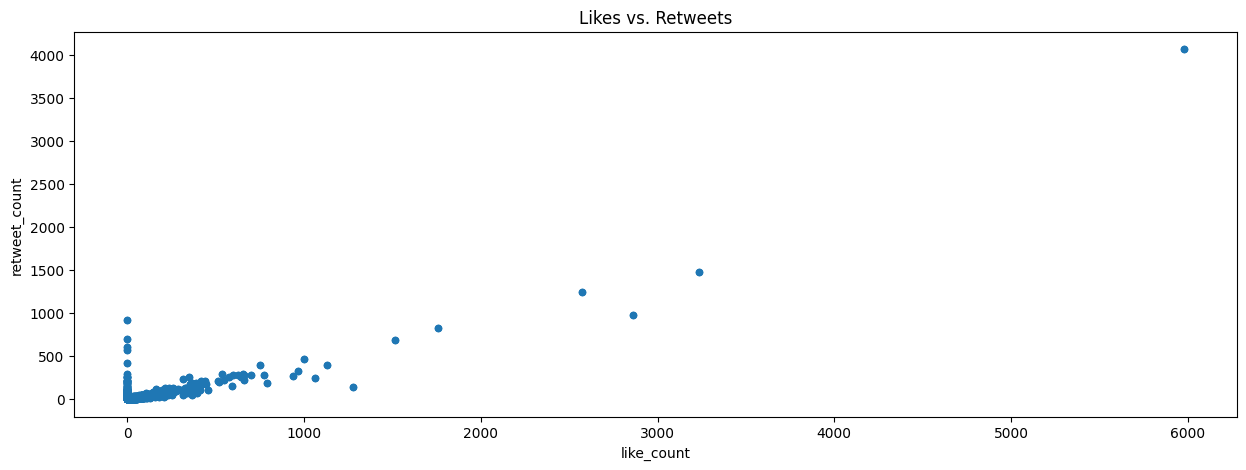

In [ ]:
# ============================================================================ #
#       DV = INTENSITY/VOLUME OF REACTIONS (& TW METRICS)(OVER TIME)           #
# ============================================================================ #

#7## 'DIRECT' REACTIONS (using df_IVCT): TW METRICS - in direct response to Tweets

# Get descriptive statistics for retweets, likes, and quotes
likes_retweets_quotes_stats = df_IVCT[['retweet_count', 'like_count', 'quote_count']].describe().T
print(likes_retweets_quotes_stats)

# Calculate the correlation between likes and retweets
likes_retweets_corr = df_IVCT['retweet_count'].corr(df_IVCT['like_count'])
print("Correlation between Likes and Retweets:", likes_retweets_corr)

# Create a scatter plot of likes vs. retweets
df_IVCT.plot(kind='scatter', x='like_count', y='retweet_count', title="Likes vs. Retweets")

Frequency counts for Likes:
0      1012
10      308
14      288
12      278
8       248
       ... 
521       2
261       2
275       2
348       2
256       2
Name: like_count, Length: 233, dtype: int64
Top 10 Like Counts with Percentages:
0    0.13
10   0.04
14   0.04
12   0.04
8    0.03
11   0.03
9    0.03
16   0.03
7    0.03
13   0.03
Name: like_count, dtype: float64
Average Likes for Tweets with At Least One Like:
count   6632.00
mean      39.83
std      158.85
min        1.00
25%       11.00
50%       18.00
75%       31.00
max     5979.00
Name: like_count, dtype: float64
Average Likes for Original Tweets with More Likes than Average Retweets:
count   3518.00
mean      66.11
std      214.69
min       17.00
25%       22.00
50%       30.00
75%       50.00
max     5979.00
Name: like_count, dtype: float64


Text(0, 0.5, '# Likes')

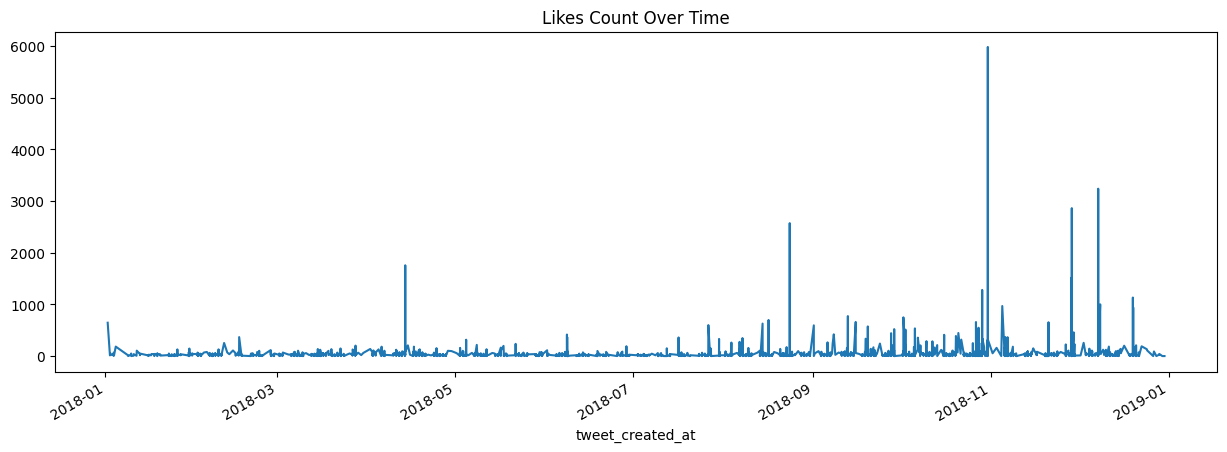

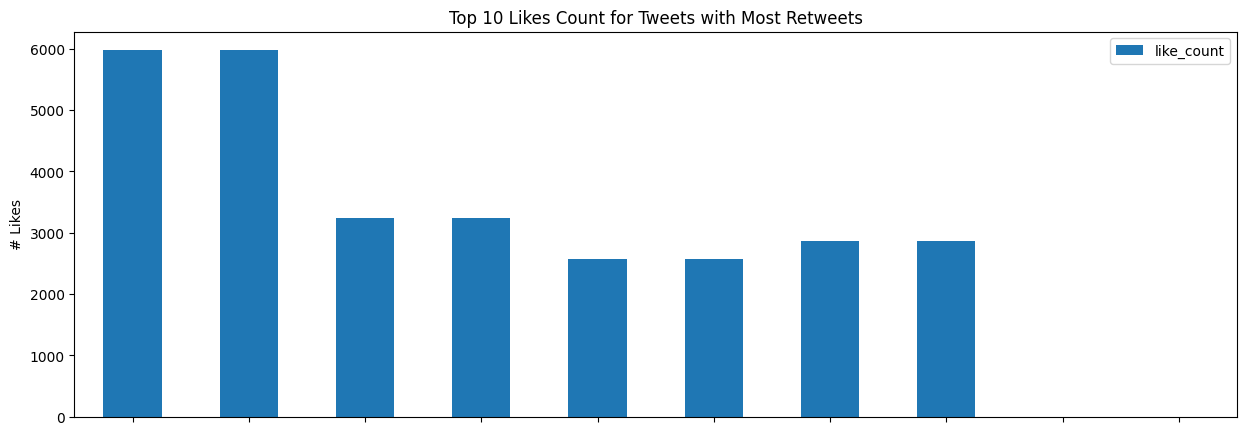

In [ ]:

# Get frequency counts for likes
like_count_counts = df_IVCT['like_count'].value_counts()
print("Frequency counts for Likes:")
print(like_count_counts)

# Get the top 10 like counts with percentages
top_10_like_counts_percentage = df_IVCT['like_count'].value_counts(normalize=True)[:10]
print("Top 10 Like Counts with Percentages:")
print(top_10_like_counts_percentage)

# Get average likes for tweets with at least one like
average_likes_for_likes_gt_0 = df_IVCT[df_IVCT['like_count'] > 0]['like_count'].describe()
print("Average Likes for Tweets with At Least One Like:")
print(average_likes_for_likes_gt_0)

# Get average likes for original tweets with more likes than the average
average_likes_for_original_tweets = df_IVCT[df_IVCT['like_count'] > df_IVCT['retweet_count'].mean()]['like_count'].describe()
print("Average Likes for Original Tweets with More Likes than Average Retweets:")
print(average_likes_for_original_tweets)

# Plot the likes count
df_IVCT['like_count'].plot(kind='line', title="Likes Count Over Time")

# Sort the DataFrame by retweet_count and plot likes count
df_IVCT_sorted = df_IVCT.sort_values(by='retweet_count', ascending=False)
likes_bar_plot_IVCT = df_IVCT_sorted[['like_count']].head(10).plot(kind='bar', title="Top 10 Likes Count for Tweets with Most Retweets")
likes_bar_plot_IVCT.set_xticklabels('')
likes_bar_plot_IVCT.set_xlabel('')
likes_bar_plot_IVCT.set_ylabel('# Likes')

#NOTE: to see the skewed distribution more clearly, splitting up the df may be necexssary (e.g. year by year)

               count  mean  std  min  25%  50%  75%  max
retweet_count   6.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
like_count      6.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
quote_count     6.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
Correlation between Likes and Retweets (df_IVCR): nan
Frequency counts for Likes in df_IVCR:
0    6
Name: like_count, dtype: int64
Top 10 Like Counts with Percentages in df_IVCR:
0   1.00
Name: like_count, dtype: float64
Average Likes for Tweets with At Least One Like (df_IVCR):
count   0.00
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: like_count, dtype: float64
Average Likes for Original Tweets with More Likes than Average Retweets (df_IVCR):
count   0.00
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: like_count, dtype: float64


Text(0, 0.5, '# Likes')

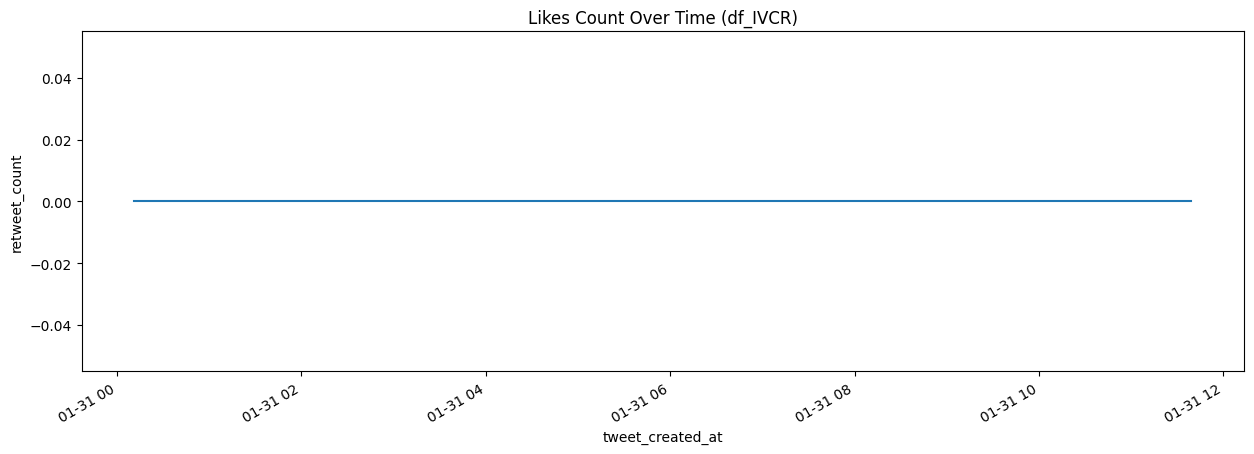

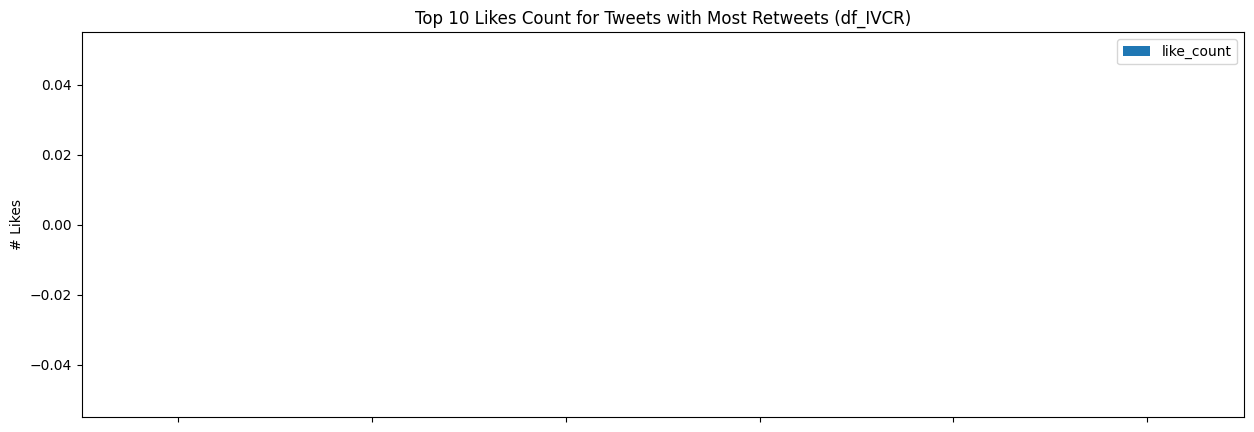

In [ ]:
#8## 'INDIRECT' REACTIONS (using df_IVCR): TW metrics in indirect response, i.e. further reactions to Tweet replies/comments

##same as above, for df_IVCR

# Get descriptive statistics for retweets, likes, and quotes in df_IVCR
likes_retweets_quotes_stats_IVCR = df_IVCR[['retweet_count', 'like_count', 'quote_count']].describe().T
print(likes_retweets_quotes_stats_IVCR)

# Calculate the correlation between likes and retweets in df_IVCR
likes_retweets_corr_IVCR = df_IVCR['retweet_count'].corr(df_IVCR['like_count'])
print("Correlation between Likes and Retweets (df_IVCR):", likes_retweets_corr_IVCR)

# Create a scatter plot of likes vs. retweets in df_IVCR
df_IVCR.plot(kind='scatter', x='like_count', y='retweet_count', title="Likes vs. Retweets (df_IVCR)")

# Get frequency counts for likes in df_IVCR
like_count_counts_IVCR = df_IVCR['like_count'].value_counts()
print("Frequency counts for Likes in df_IVCR:")
print(like_count_counts_IVCR)

# Get the top 10 like counts with percentages in df_IVCR
top_10_like_counts_percentage_IVCR = df_IVCR['like_count'].value_counts(normalize=True)[:10]
print("Top 10 Like Counts with Percentages in df_IVCR:")
print(top_10_like_counts_percentage_IVCR)

# Get average likes for tweets with at least one like in df_IVCR
average_likes_for_likes_gt_0_IVCR = df_IVCR[df_IVCR['like_count'] > 0]['like_count'].describe()
print("Average Likes for Tweets with At Least One Like (df_IVCR):")
print(average_likes_for_likes_gt_0_IVCR)

# Get average likes for original tweets with more likes than the average in df_IVCR
average_likes_for_original_tweets_IVCR = df_IVCR[df_IVCR['like_count'] > df_IVCR['retweet_count'].mean()]['like_count'].describe()
print("Average Likes for Original Tweets with More Likes than Average Retweets (df_IVCR):")
print(average_likes_for_original_tweets_IVCR)

# Plot the likes count in df_IVCR
df_IVCR['like_count'].plot(kind='line', title="Likes Count Over Time (df_IVCR)")

# Sort the DataFrame by retweet_count and plot likes count in df_IVCR
df_IVCR_sorted = df_IVCR.sort_values(by='retweet_count', ascending=False)
likes_bar_plot_IVCR = df_IVCR_sorted[['like_count']].head(10).plot(kind='bar', title="Top 10 Likes Count for Tweets with Most Retweets (df_IVCR)")
likes_bar_plot_IVCR.set_xticklabels('')
likes_bar_plot_IVCR.set_xlabel('')
likes_bar_plot_IVCR.set_ylabel('# Likes')

In [ ]:
# ============================================================================ #
#                    # HASHTAG ETC (PRE-)ANALYSIS FROM IV/DV DATA              #
# ============================================================================ #

#NOTE: emprically, hashtags themselves can indicate... sentimiment expresssion (DV), the public mood/issue salience/attention (CV), or political ideology (confounder)
## --> this pre-analysis may yield the use of different hashtags, some of which may then be used as NLP model features later on
#again: consider getting rid of non-original tweets (=RTs)

#9## compute summary description of HT & plot it out

###NEED TO CREATE HASHTAG DICTIONARY FIRST: entities_hashtags
import re

# Define a function to extract hashtags from tweet text
def extract_hashtags(tweet_text):
    return re.findall(r'#\w+', tweet_text)

# Create a dictionary to count hashtags for IVCT
hashtags_dict_IVCT = {}
for tweet_text in df_IVCT['tweet_text']:
    hashtags = extract_hashtags(tweet_text)
    for hashtag in hashtags:
        if hashtag in hashtags_dict_IVCT:
            hashtags_dict_IVCT[hashtag] += 1
        else:
            hashtags_dict_IVCT[hashtag] = 1

# Print the count of each hashtag in IVCT
for hashtag, count in hashtags_dict_IVCT.items():
    print(f"{hashtag}: {count} times")

# Create a dictionary to count hashtags for IVCR
hashtags_dict_IVCR = {}
for tweet_text in df_IVCR['tweet_text']:
    hashtags = extract_hashtags(tweet_text)
    for hashtag in hashtags:
        if hashtag in hashtags_dict_IVCR:
            hashtags_dict_IVCR[hashtag] += 1
        else:
            hashtags_dict_IVCR[hashtag] = 1

# Print the count of each hashtag in IVCR
for hashtag, count in hashtags_dict_IVCR.items():
    print(f"{hashtag}: {count} times")

# List all the hashtags extracted from IVCT
for hashtag in hashtags_dict_IVCT.keys():
    print(hashtag)

# List all the hashtags extracted from IVCR
for hashtag in hashtags_dict_IVCR.keys():
    print(hashtag)

# Compute descriptive summaries for hashtags count in IVCT
hashtags_count_IVCT_summary = df_IVCT['hashtags_dummy_IVCT'].describe()
print("Summary Statistics for Hashtags Count in IVCT:")
print(hashtags_count_IVCT_summary)

# Compute descriptive summaries for hashtags count in IVCR
hashtags_count_IVCR_summary = df_IVCR['hashtags_dummy_IVCR'].describe()
print("Summary Statistics for Hashtags Count in IVCR:")
print(hashtags_count_IVCR_summary)

#TrabalhoEscravoNão: 48 times
#MPF: 14 times
#REMPMporECIs: 2 times
#LavaJato: 124 times
#Lavajato: 2 times
#DireitosHumanos: 58 times
#eleicoes2018: 28 times
#cnmp: 20 times
#OperaçãoLavaJato: 2 times
#OpMãosàObra: 2 times
#OperaçãoZelotes: 4 times
#MP: 2 times
#assédiosexual: 2 times
#JustiçaPesquisa: 2 times
#OperaçãoGreenfield: 2 times
#MeioAmbiente: 26 times
#MinistérioPúblicoestáaqui: 2 times
#DireitosDoCidadão: 4 times
#VidasNegras: 2 times
#TráficoDePessoasNão: 4 times
#meioambiente: 14 times
#Retrospectiva2017: 8 times
#ViajeSeguro: 2 times
#MPFnoMarajó: 2 times
#MPFDigital: 4 times
#86anosdovotofeminino: 4 times
#MulheresNaPolitica: 4 times
#MulheresNaPolítica: 12 times
#OperaçãoManus: 2 times
#mulheresnapolítica: 4 times
#nãoénão: 2 times
#CarnavalSemAssédio: 2 times
#CarnavalNaoeDesculpa: 2 times
#trabalhoescravonão: 2 times
#SID2018: 8 times
#Dialogando: 2 times
#DeixaDisso: 2 times
#CompartilheRespeito: 2 times
#PGRs: 2 times
#CorrupçãoNão: 6 times
#Eleitoral: 18 times
#c

In [ ]:

#10## same for mentions

# Define a function to extract mentions from tweet text
def extract_mentions(tweet_text):
    return re.findall(r'@\w+', tweet_text)

# Create a dictionary to count mentions for IVCT
mentions_dict_IVCT = {}
for tweet_text in df_IVCT['tweet_text']:
    mentions = extract_mentions(tweet_text)
    for mention in mentions:
        if mention in mentions_dict_IVCT:
            mentions_dict_IVCT[mention] += 1
        else:
            mentions_dict_IVCT[mention] = 1

# Print the count of each mention in IVCT
for mention, count in mentions_dict_IVCT.items():
    print(f"{mention}: {count} times")

# Create a dictionary to count mentions for IVCR
mentions_dict_IVCR = {}
for tweet_text in df_IVCR['tweet_text']:
    mentions = extract_mentions(tweet_text)
    for mention in mentions:
        if mention in mentions_dict_IVCR:
            mentions_dict_IVCR[mention] += 1
        else:
            mentions_dict_IVCR[mention] = 1

# Print the count of each mention in IVCR
for mention, count in mentions_dict_IVCR.items():
    print(f"{mention}: {count} times")

# List all the mentions extracted from IVCT
for mention in mentions_dict_IVCT.keys():
    print(mention)

# List all the mentions extracted from IVCR
for mention in mentions_dict_IVCR.keys():
    print(mention)

# Compute descriptive summaries for mentions count in IVCT
mentions_count_IVCT_summary = df_IVCT['mentions_dummy_IVCT'].describe()
print("Summary Statistics for Mentions Count in IVCT:")
print(mentions_count_IVCT_summary)

# Compute descriptive summaries for mentions count in IVCR
mentions_count_IVCR_summary = df_IVCR['mentions_dummy_IVCR'].describe()
print("Summary Statistics for Mentions Count in IVCR:")
print(mentions_count_IVCR_summary)

@WSarai: 30 times
@PFDC_MPF: 66 times
@ANPR_Brasil: 72 times
@cnmp_oficial: 42 times
@jcarloscr: 8 times
@TRF4_oficial: 2 times
@policiafederal: 12 times
@MPF_PGR: 74 times
@MPF_AP: 28 times
@MPF_PRRJ: 36 times
@MPT_PGT: 8 times
@MPF_SP: 36 times
@MPF_PE: 10 times
@BancoCentralBR: 2 times
@CNJ_oficial: 2 times
@MPF_DF: 32 times
@VladimirAras: 12 times
@UNESCOBrasil: 14 times
@MPF_AL: 2 times
@MPF_RS: 12 times
@socioambiental: 18 times
@ciminacional: 4 times
@safernet: 12 times
@googlebrasil: 2 times
@ComuNICbr: 4 times
@certbr: 2 times
@Vivoemrede: 2 times
@youtube: 2 times
@Facebook: 2 times
@abranet_brasil: 2 times
@GoogleBrasil: 2 times
@AlanMansur: 24 times
@MPF_AM: 24 times
@JaniceAscari: 16 times
@CIDH: 2 times
@ANAgovbr: 2 times
@MPF_PA: 54 times
@mpdft: 18 times
@mpf: 6 times
@OITBrasil: 2 times
@MPF_GO: 12 times
@mpf_prr3: 8 times
@STJnoticias: 4 times
@ONUBrasil: 6 times
@mpf_oficial: 2 times
@STF_oficial: 16 times
@MPF_PRR1: 40 times
@MPF_BA: 6 times
@franceaubresil: 6 times

In [ ]:

#11## same for retweets

# Create a dictionary to count retweets for IVCT
retweets_dict_IVCT = {}
for tweet_text in df_IVCT['tweet_text']:
    retweets = re.findall(r'RT @\w+:', tweet_text)
    for retweet in retweets:
        if retweet in retweets_dict_IVCT:
            retweets_dict_IVCT[retweet] += 1
        else:
            retweets_dict_IVCT[retweet] = 1

# Print the count of each retweet in IVCT
for retweet, count in retweets_dict_IVCT.items():
    print(f"{retweet}: {count} times")

# Create a dictionary to count retweets for IVCR
retweets_dict_IVCR = {}
for tweet_text in df_IVCR['tweet_text']:
    retweets = re.findall(r'RT @\w+:', tweet_text)
    for retweet in retweets:
        if retweet in retweets_dict_IVCR:
            retweets_dict_IVCR[retweet] += 1
        else:
            retweets_dict_IVCR[retweet] = 1

# Print the count of each retweet in IVCR
for retweet, count in retweets_dict_IVCR.items():
    print(f"{retweet}: {count} times")

# List all the retweets extracted from IVCT
for retweet in retweets_dict_IVCT.keys():
    print(retweet)

# List all the retweets extracted from IVCR
for retweet in retweets_dict_IVCR.keys():
    print(retweet)

# Compute descriptive summaries for retweets count in IVCT
retweets_count_IVCT_summary = df_IVCT['retweet_count'].describe()
print("Summary Statistics for Retweets Count in IVCT:")
print(retweets_count_IVCT_summary)

# Compute descriptive summaries for retweets count in IVCR
retweets_count_IVCR_summary = df_IVCR['retweet_count'].describe()
print("Summary Statistics for Retweets Count in IVCR:")
print(retweets_count_IVCR_summary)

RT @WSarai:: 30 times
RT @PFDC_MPF:: 64 times
RT @ANPR_Brasil:: 62 times
RT @cnmp_oficial:: 42 times
RT @jcarloscr:: 8 times
RT @TRF4_oficial:: 2 times
RT @policiafederal:: 2 times
RT @MPF_AP:: 28 times
RT @MPF_PRRJ:: 30 times
RT @MPT_PGT:: 8 times
RT @MPF_SP:: 32 times
RT @MPF_PE:: 10 times
RT @BancoCentralBR:: 2 times
RT @CNJ_oficial:: 2 times
RT @VladimirAras:: 12 times
RT @UNESCOBrasil:: 14 times
RT @MPF_AL:: 2 times
RT @MPF_RS:: 12 times
RT @socioambiental:: 16 times
RT @ciminacional:: 4 times
RT @safernet:: 10 times
RT @AlanMansur:: 24 times
RT @MPF_AM:: 16 times
RT @ANAgovbr:: 2 times
RT @MPF_PA:: 52 times
RT @mpdft:: 16 times
RT @MPF_GO:: 12 times
RT @mpf_prr3:: 8 times
RT @STJnoticias:: 4 times
RT @ONUBrasil:: 4 times
RT @MPF_PGR:: 30 times
RT @STF_oficial:: 14 times
RT @MPF_PRR1:: 40 times
RT @MPF_BA:: 6 times
RT @franceaubresil:: 6 times
RT @mmeioambiente:: 2 times
RT @PNUDBrasil:: 2 times
RT @GreenpeaceBR:: 2 times
RT @JaniceAscari:: 14 times
RT @PRE_SP:: 12 times
RT @MPF_D

In [ ]:

#11### same for hyperlinks

# Create a dictionary to count hyperlinks for IVCT
hyperlinks_dict_IVCT = {}
for tweet_text in df_IVCT['tweet_text']:
    hyperlinks = re.findall(r'http[s]?://\S+', tweet_text)
    for hyperlink in hyperlinks:
        if hyperlink in hyperlinks_dict_IVCT:
            hyperlinks_dict_IVCT[hyperlink] += 1
        else:
            hyperlinks_dict_IVCT[hyperlink] = 1

# Print the count of each hyperlink in IVCT
for hyperlink, count in hyperlinks_dict_IVCT.items():
    print(f"{hyperlink}: {count} times")

# Create a dictionary to count hyperlinks for IVCR
hyperlinks_dict_IVCR = {}
for tweet_text in df_IVCR['tweet_text']:
    hyperlinks = re.findall(r'http[s]?://\S+', tweet_text)
    for hyperlink in hyperlinks:
        if hyperlink in hyperlinks_dict_IVCR:
            hyperlinks_dict_IVCR[hyperlink] += 1
        else:
            hyperlinks_dict_IVCR[hyperlink] = 1

# Print the count of each hyperlink in IVCR
for hyperlink, count in hyperlinks_dict_IVCR.items():
    print(f"{hyperlink}: {count} times")

# List all the hyperlinks extracted from IVCT
for hyperlink in hyperlinks_dict_IVCT.keys():
    print(hyperlink)

# List all the hyperlinks extracted from IVCR
for hyperlink in hyperlinks_dict_IVCR.keys():
    print(hyperlink)

# Compute descriptive summaries for hyperlinks count in IVCT
hyperlinks_count_IVCT_summary = df_IVCT['hyperlinks_dummy_IVCT'].describe()
print("Summary Statistics for Hyperlinks Count in IVCT:")
print(hyperlinks_count_IVCT_summary)

# Compute descriptive summaries for hyperlinks count in IVCR
hyperlinks_count_IVCR_summary = df_IVCR['hyperlinks_dummy_IVCR'].describe()
print("Summary Statistics for Hyperlinks Count in IVCR:")
print(hyperlinks_count_IVCR_summary)